In [33]:
from qiskit import *
from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [34]:
# File containing API token
f = open("quantum-token.txt", "r")
IBMQ.save_account(f.read())

configrc.store_credentials:WARNING:2022-11-20 17:43:17,275: Credentials already present. Set overwrite=True to overwrite.


In [35]:
# Testing to see if the account details can be fetched
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-11-20 17:43:18,576: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [36]:
# 2 qubit quantum register
qr = QuantumRegister(2)

# 2 bit classical register
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr,cr)
circuit.draw()

q9_0: 
      
q9_1: 
      
c3_0: 
      
c3_1:

In [37]:
circuit.h(qr[0])
circuit.draw()

┌───┐
q9_0: ┤ H ├
      └───┘
q9_1: ─────
           
c3_0: ═════
           
c3_1: ═════

In [38]:
circuit.cx(qr[0],qr[1])
circuit.draw()

┌───┐     
q9_0: ┤ H ├──■──
      └───┘┌─┴─┐
q9_1: ─────┤ X ├
           └───┘
c3_0: ══════════
                
c3_1: ══════════

In [39]:
# This should generate an entangled state
circuit.measure(qr,cr)
circuit.draw()

┌───┐     ┌─┐   
q9_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q9_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c3_0: ═══════════╩══╬═
                    ║ 
c3_1: ══════════════╩═

In [40]:
# Quantum assembly simulator
simulator = Aer.get_backend('qasm_simulator')

In [41]:
# Executing the simulator
result = execute(circuit,backend=simulator).result()

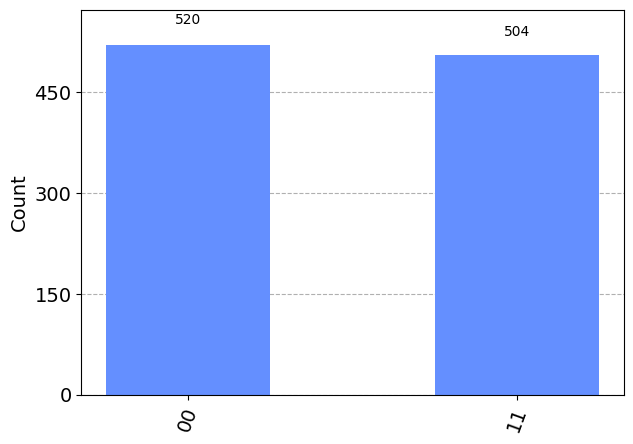

In [42]:
# This shows us the result we get on different tries.
# Since its entangled we only get 00 and 11
# Simulators simulate perfect quantum devices
plot_histogram(result.get_counts(circuit))

In [43]:
# Running on quantum computer
provider = IBMQ.get_provider('ibm-q')

In [32]:
# List all available backends
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [46]:
qcomp = provider.get_backend('ibmq_lima')

In [47]:
from qiskit.tools.monitor import job_monitor

In [48]:
job = execute(circuit,backend=qcomp)

In [49]:
job_monitor(job)

Job Status: job has successfully run


In [50]:
result = job.result()

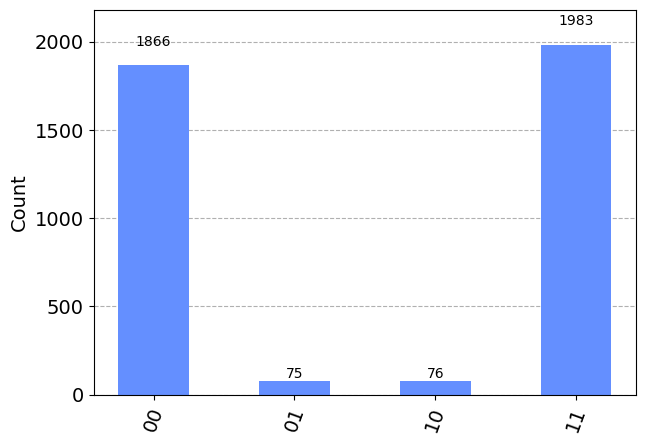

In [51]:
# Real quantum devices are succeptible to small quantum errors
plot_histogram(result.get_counts(circuit))

In [52]:
result.results

[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1866, '0x1': 75, '0x2': 76, '0x3': 1983}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]], n_qubits=5, qreg_sizes=[['q', 5]], clbit_labels=[['c3', 0], ['c3', 1]], memory_slots=2, creg_sizes=[['c3', 2]], name='circuit-111', global_phase=0.7853981633974483, metadata={}), status=done)]